[View in Colaboratory](https://colab.research.google.com/github/tomwilde/100DaysOfMLCode/blob/master/4_numpy_logisticRegression.ipynb)

In [0]:
!pip install -U -q PyDrive

import numpy as np
import matplotlib.pyplot as plt
import pandas
import io
import math


# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# from: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
#
# wheras linear regression provides a linear response / output logistic regression uses the sigmoid fn to project this as a classification
# => eg: what's my projected test score vs will I pass? (of *course* I'll pass!)
#
# A note of loss fns: we could use MSE here but actually we'll use Log-loss aka Cross-Entropy 
#                     (these push the classification either way using a log fn to get more pronounced results - better than simple MSE)


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1_d2opSoZgMsSeoQUjtOcRQj5l0zO-Upi'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

dataset = pandas.read_csv(io.StringIO(downloaded.GetContentString())).as_matrix()

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-1 * z))

In [0]:
def predict(features, weights):
  
  z = np.dot(features, weights)
  return sigmoid(z) # tadaa

In [0]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum()/observations

    return cost

In [0]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [0]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

In [0]:
def classify(preds):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decision_boundary = np.vectorize(decision_boundary)
  return decision_boundary(predictions).flatten()

In [0]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [0]:
def train(X, y, weights, alpha, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(X, y, weights, alpha)

        # Calculate cost for auditing purposes
        cost = cost_function(X, y, weights)

        # Log Progress
        if i % 100 == 0:
          print "iter: "+str(i) + " cost: "+str(cost)
    return weights


In [0]:
# work out 
y = dataset[:,4].reshape(200,1)
X = dataset[:,[1,2,3]].reshape(200,3)

weights = np.ones((4,1))
c = 0

alpha = 0.005
iters = 1000

# normalise the data
bias = np.ones(shape=(200,1))
y = y/np.linalg.norm(y, ord=np.inf, axis=0, keepdims=True)
X = X/np.linalg.norm(X, ord=np.inf, axis=0, keepdims=True)
X = np.append(bias, X, axis=1)
               

In [28]:
weights = train(X, y, weights, alpha, iters)
print(weights)

iter: 0 cost: 1.1005739568644821
iter: 100 cost: 1.0092836915135524
iter: 200 cost: 0.9313752320848429
iter: 300 cost: 0.8668320665520409
iter: 400 cost: 0.8149097104824443
iter: 500 cost: 0.7742740960060958
iter: 600 cost: 0.7432376087767796
iter: 700 cost: 0.7200110539267996
iter: 800 cost: 0.7029045681424619
iter: 900 cost: 0.690448773656554
[[-0.17586268]
 [ 0.57850873]
 [ 0.54502072]
 [ 0.68972199]]


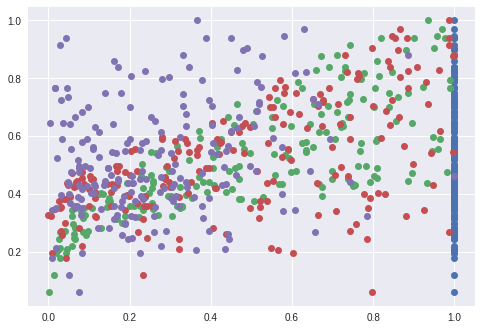

In [29]:
_ = plt.plot(X,y, 'o')